# POSH CASH BALANCE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pos_cash_balance = pd.read_csv('POS_CASH_balance.csv')

## INFORMASI AWAL

In [4]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [5]:
pos_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [6]:
# Memisahkan kolom numerikal dan kategorikal
kolom_numerikal = pos_cash_balance.select_dtypes(include=['number']).columns
kolom_kategorikal = pos_cash_balance.select_dtypes(include=['object']).columns

## EDA KOLOM NUMERICAL

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)

### Describe

In [8]:
pos_cash_balance[kolom_numerikal].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,10001358.00,1903216.60,535846.53,1000001.00,1434405.00,1896565.00,2368963.00,2843499.00
SK_ID_CURR,10001358.00,278403.86,102763.75,100001.00,189550.00,278654.00,367429.00,456255.00
MONTHS_BALANCE,10001358.00,-35.01,26.07,-96.00,-54.00,-28.00,-13.00,-1.00
CNT_INSTALMENT,9975287.00,17.09,12.00,1.00,10.00,12.00,24.00,92.00
CNT_INSTALMENT_FUTURE,9975271.00,10.48,11.11,0.00,3.00,7.00,14.00,85.00
SK_DPD,10001358.00,11.61,132.71,0.00,0.00,0.00,0.00,4231.00
SK_DPD_DEF,10001358.00,0.65,32.76,0.00,0.00,0.00,0.00,3595.00


### Boxplot

C:\Users\sanny\AppData\Local\Temp\ipykernel_9136\1604181937.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_9136\1604181937.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_9136\1604181937.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_9136\1604181937.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_9136\1604181937.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_9136\1604181937.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


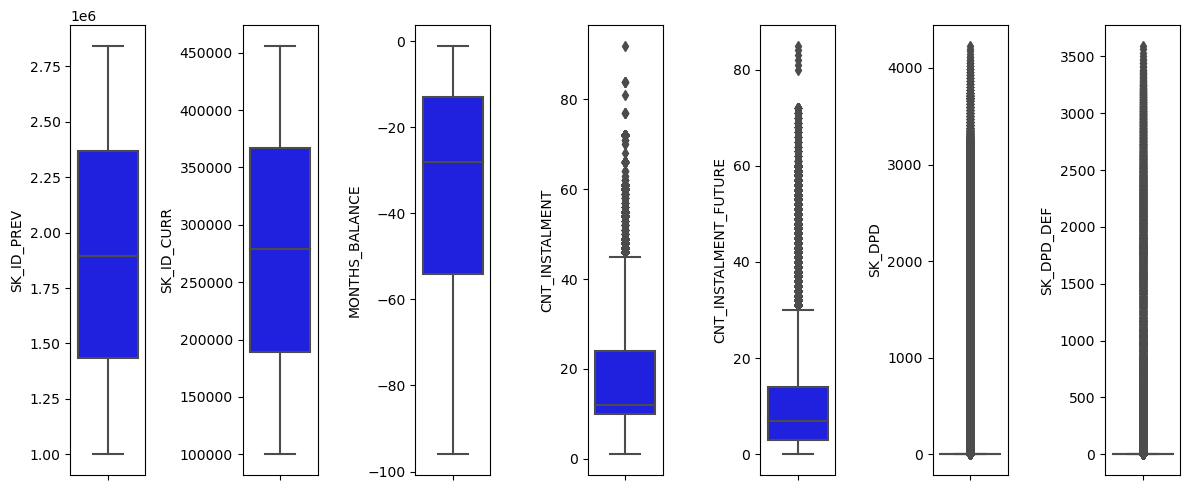

In [9]:
plt.figure(figsize=(12, 5))

for i in range(0, len(kolom_numerikal)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=pos_cash_balance[kolom_numerikal[i]], color='blue', orient='v')
    plt.tight_layout()

### Distplot

### Heatmap

<Axes: >

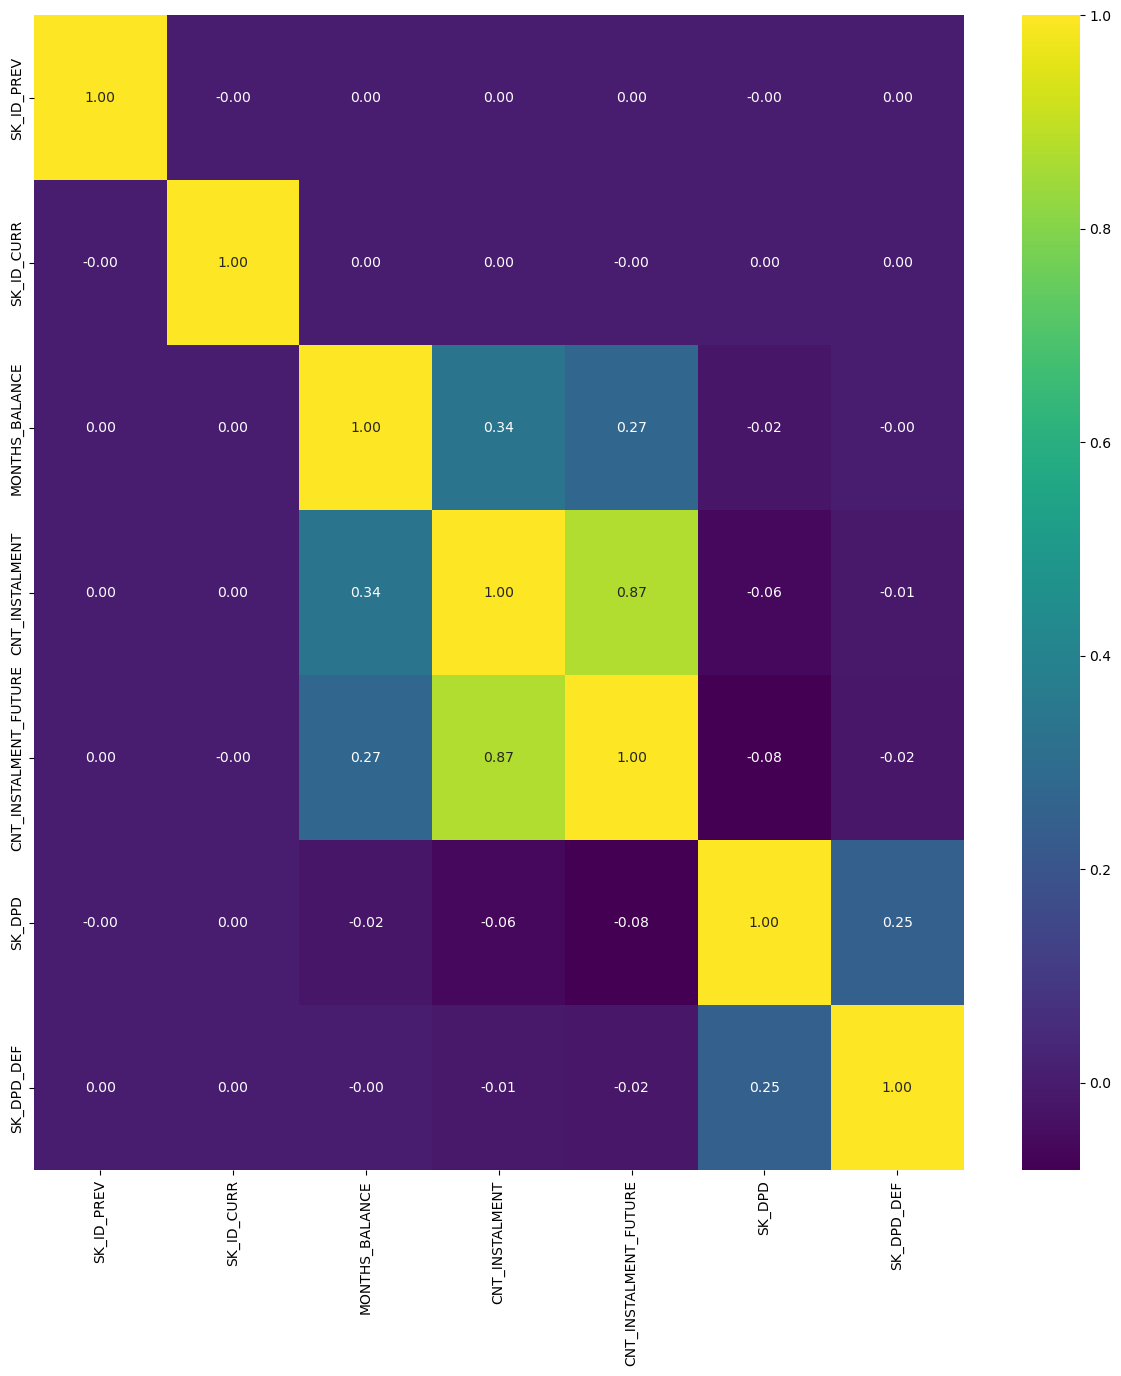

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(pos_cash_balance[kolom_numerikal].corr(), cmap='viridis', annot=True, fmt='.2f')

## EDA KOLOM KATEGORIKAL

### Describe

In [11]:
pos_cash_balance[kolom_kategorikal].describe().transpose()

,count,unique,top,freq
NAME_CONTRACT_STATUS,10001358,9,Active,9151119


### Cek Nilai Unik

In [12]:
for col in kolom_kategorikal:
    print(f'''Value count kolom {col}:''')
    print(pos_cash_balance[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_STATUS:
NAME_CONTRACT_STATUS
Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: count, dtype: int64



### Distribusi Barchart

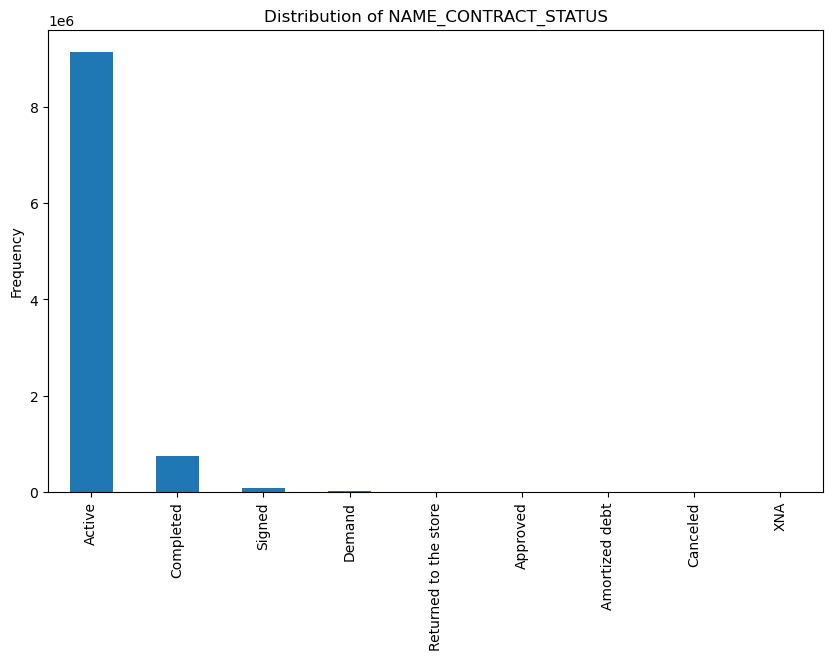

In [13]:
# Membuat bar chart untuk setiap kolom kategorikal
for i, col in enumerate(kolom_kategorikal):
    plt.figure(figsize=(10, 6))
    pos_cash_balance[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel("Frequency")
    plt.show()

# DATA PREPROCESSING

## MISSING VALUES

### Cek Missing Values

In [14]:
# Hitung jumlah missing values untuk setiap kolom
jumlah_missing = pos_cash_balance.isnull().sum()

# Hitung persentase missing values untuk setiap kolom
persentase_missing = round((jumlah_missing / len(pos_cash_balance)) * 100, 2)

# Gabungkan hasil dalam satu DataFrame
missing_summary = pd.DataFrame({
    'Jumlah Missing Values': jumlah_missing,
    'Persentase Missing Values (%)': persentase_missing
})

# Filter hanya kolom yang memiliki missing values
missing_summary_filtered = missing_summary[missing_summary['Jumlah Missing Values'] > 0]

print(missing_summary_filtered)

                       Jumlah Missing Values  Persentase Missing Values (%)
CNT_INSTALMENT                         26071                           0.26
CNT_INSTALMENT_FUTURE                  26087                           0.26


### Penanganan Missing Values

In [18]:
# Mengganti nilai NaN dengan median
pos_cash_balance[['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']] = pos_cash_balance[['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']].apply(lambda x: x.fillna(x.median()))

### Cek Kembali

In [19]:
pos_cash_balance.isna().sum()

SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
SK_DPD                   0
SK_DPD_DEF               0
dtype: int64

In [20]:
pos_cash_balance = pos_cash_balance.drop(columns=['CNT_INSTALMENT_FUTURE'])

## OUTLIERS

In [21]:
pos_cash_balance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,10001358.00,1903216.60,535846.53,1000001.00,1434405.00,1896565.00,2368963.00,2843499.00
SK_ID_CURR,10001358.00,278403.86,102763.75,100001.00,189550.00,278654.00,367429.00,456255.00
MONTHS_BALANCE,10001358.00,-35.01,26.07,-96.00,-54.00,-28.00,-13.00,-1.00
CNT_INSTALMENT,10001358.00,17.08,11.98,1.00,10.00,12.00,24.00,92.00
SK_DPD,10001358.00,11.61,132.71,0.00,0.00,0.00,0.00,4231.00
SK_DPD_DEF,10001358.00,0.65,32.76,0.00,0.00,0.00,0.00,3595.00


### Menggeser Kolom dengan Nilai Negatif

In [22]:
# Mencari nilai minimum pada kolom
min_value = pos_cash_balance['MONTHS_BALANCE'].min()

# Jika ada nilai negatif, tambahkan nilai positif untuk menggeser semua nilai menjadi positif
if min_value < 0:
    pos_cash_balance['MONTHS_BALANCE'] = pos_cash_balance['MONTHS_BALANCE'] + abs(min_value)

### Cek Hasil Penggeseran

In [23]:
pos_cash_balance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,10001358.00,1903216.60,535846.53,1000001.00,1434405.00,1896565.00,2368963.00,2843499.00
SK_ID_CURR,10001358.00,278403.86,102763.75,100001.00,189550.00,278654.00,367429.00,456255.00
MONTHS_BALANCE,10001358.00,60.99,26.07,0.00,42.00,68.00,83.00,95.00
CNT_INSTALMENT,10001358.00,17.08,11.98,1.00,10.00,12.00,24.00,92.00
SK_DPD,10001358.00,11.61,132.71,0.00,0.00,0.00,0.00,4231.00
SK_DPD_DEF,10001358.00,0.65,32.76,0.00,0.00,0.00,0.00,3595.00


### Log Transformation

In [24]:
# Kolom ini dihapus karena tidak akan digunakan kembali
pos_cash_balance = pos_cash_balance.drop(columns=['SK_ID_PREV'])

In [25]:
# 1. Identifikasi kolom yang tidak akan di-transformasi
# SK_ID_CURR tidak diubah, dan kolom boolean juga tidak diubah
exclude_columns = ['SK_ID_CURR'] + list(pos_cash_balance.select_dtypes(include=['bool']).columns)

# 2. Identifikasi kolom numerik yang akan di-transformasi (kecuali yang ada di exclude_columns)
numeric_columns = pos_cash_balance.select_dtypes(include=[np.number]).columns
columns_to_transform = [col for col in numeric_columns if col not in exclude_columns]

# 3. Terapkan log transformation pada kolom-kolom yang sudah diidentifikasi
# Tambahkan 1 untuk menghindari log(0)
pos_cash_balance[columns_to_transform] = pos_cash_balance[columns_to_transform].apply(lambda x: np.log1p(x))

## ENCODING

In [26]:
# Frequency Encoding
# Hitung frekuensi kemunculan untuk setiap kategori di kolom CREDIT_ACTIVE
freq_encoding = pos_cash_balance['NAME_CONTRACT_STATUS'].value_counts()

# Map frekuensi tersebut ke dalam kolom baru
pos_cash_balance['NAME_CONTRACT_STATUS_ENCODE'] = pos_cash_balance['NAME_CONTRACT_STATUS'].map(freq_encoding)

In [27]:
pos_cash_balance = pos_cash_balance.drop(columns=['NAME_CONTRACT_STATUS'])

In [28]:
pos_cash_balance.head()

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_ENCODE
0,182943,4.19,3.89,0.00,0.00,9151119
1,367990,4.16,3.61,0.00,0.00,9151119
2,397406,4.17,2.56,0.00,0.00,9151119
3,269225,4.13,3.89,0.00,0.00,9151119
4,334279,4.13,3.61,0.00,0.00,9151119


## AGGREGASI

In [30]:
# Pertama, kelompokkan berdasarkan SK_ID_CURR dan hitung rata-rata untuk kolom lainnya
agg_df = pos_cash_balance.groupby('SK_ID_CURR').mean().reset_index()

# Selanjutnya, hitung berapa kali setiap SK_ID_CURR muncul dan tambahkan sebagai kolom baru
agg_df['FREQ_POSH_CASH'] = pos_cash_balance.groupby('SK_ID_CURR').size().values

In [31]:
pos_cash_balance = agg_df

In [32]:
pos_cash_balance.head()

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_ENCODE,FREQ_POSH_CASH
0,100001,2.43,1.61,0.23,0.23,7283066.56,9
1,100002,4.46,3.22,0.00,0.00,9151119.00,19
2,100003,3.84,2.37,0.00,0.00,8550673.57,28
3,100004,4.27,1.55,0.00,0.00,7049560.00,4
4,100005,4.34,2.54,0.00,0.00,7562928.55,11


## SCALING

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Identifikasi kolom yang bertipe boolean
boolean_columns = pos_cash_balance.select_dtypes(include=['bool']).columns

# Tambahkan kolom SK_ID_CURR ke daftar kolom yang akan dikecualikan
exclude_columns = ['SK_ID_CURR'] + list(boolean_columns)

# Pilih kolom yang bukan boolean dan bukan SK_ID_CURR
scaling_columns = pos_cash_balance.columns.difference(exclude_columns)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan scaling hanya pada kolom yang dipilih
pos_cash_balance[scaling_columns] = scaler.fit_transform(pos_cash_balance[scaling_columns])

In [34]:
pos_cash_balance.head()

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_ENCODE,FREQ_POSH_CASH
0,100001,0.53,0.25,0.03,0.03,0.80,0.03
1,100002,0.98,0.70,0.00,0.00,1.00,0.06
2,100003,0.84,0.47,0.00,0.00,0.93,0.09
3,100004,0.94,0.24,0.00,0.00,0.77,0.01
4,100005,0.95,0.51,0.00,0.00,0.83,0.03


# SIMPAN DATASET KE CSV

In [35]:
# Simpan DataFrame ke file CSV
pos_cash_balance.to_csv('code_posh_cash.csv', index=False)